In [1]:
## Table of content 

# 1. Import libraries
# 2. Import dataset
# 3. EDA and visualizations 
# 4. Select features and scale features 
# 5. train and test split
# 6. Build, train, and evaluate Classifiers 
#.    A. LogisticRegression
#.    B. KNeighborsClassifier
#.    B. RandomForestClassifier

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
#import csv file
wine_data = pd.read_csv('wine.csv')

In [4]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [5]:
#check data types and missing values
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


<AxesSubplot:>

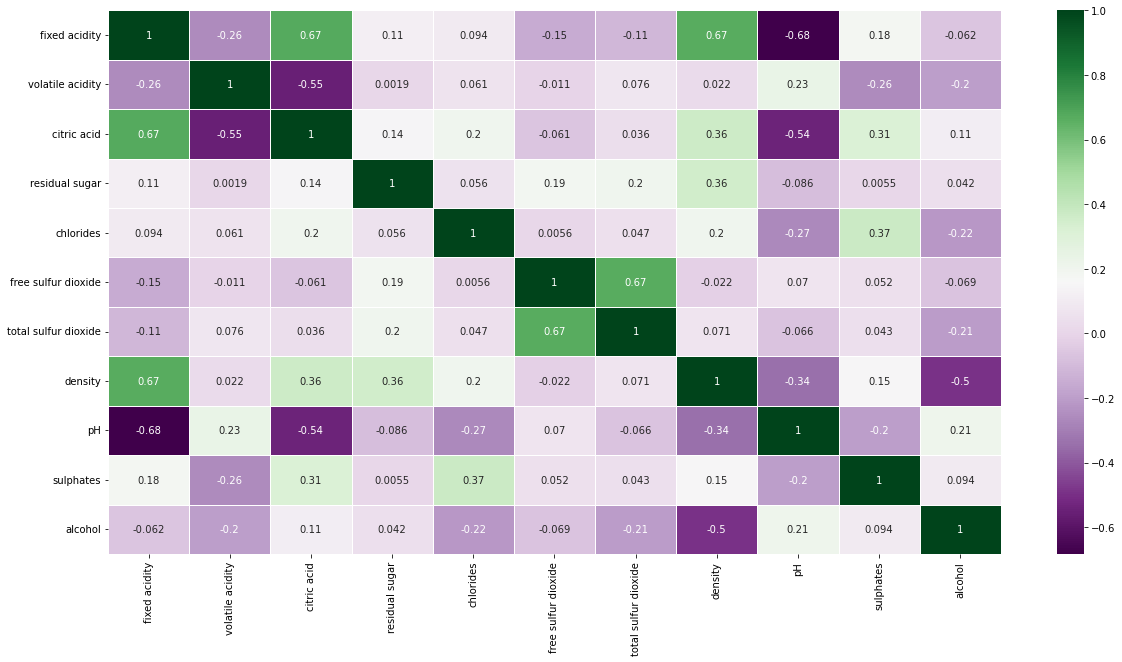

In [6]:
#plot corrlation using heatmap 
plt.figure(figsize=(20,10))
sns.heatmap(wine_data.corr(),annot= True, cmap = 'PRGn', linewidths=1)

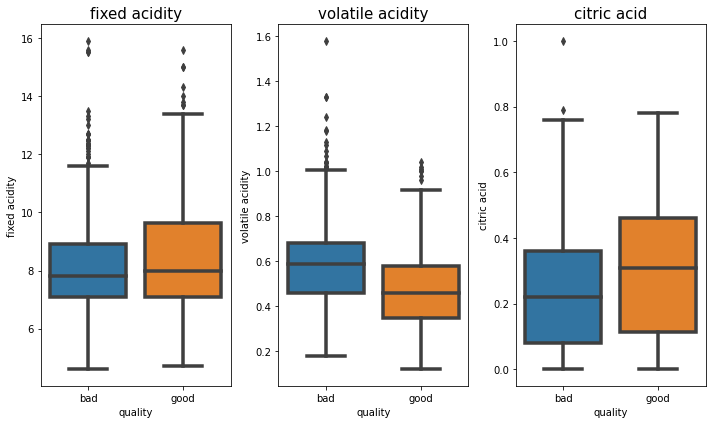

In [7]:
# boxplot for first 3 columns 
fig = plt.figure(figsize=(10,6))
for index,column in enumerate(list(wine_data.columns[:3])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = wine_data.loc[:, column], x = wine_data["quality"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

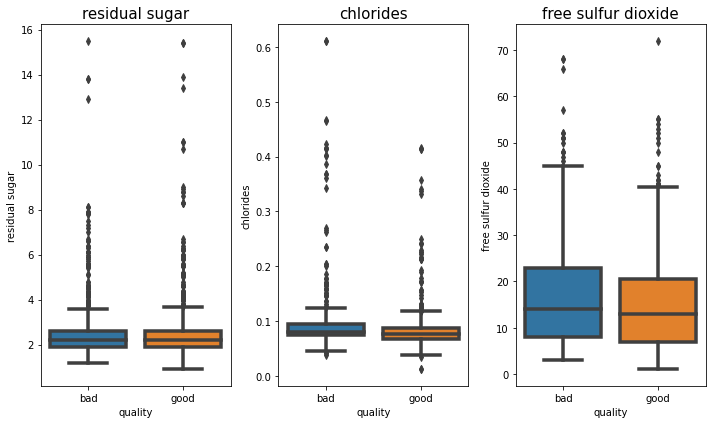

In [8]:
# boxplot for columns 4,5 and 6
fig = plt.figure(figsize=(10,6))
for index,column in enumerate(list(wine_data.columns[3:6])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = wine_data.loc[:, column], x = wine_data["quality"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

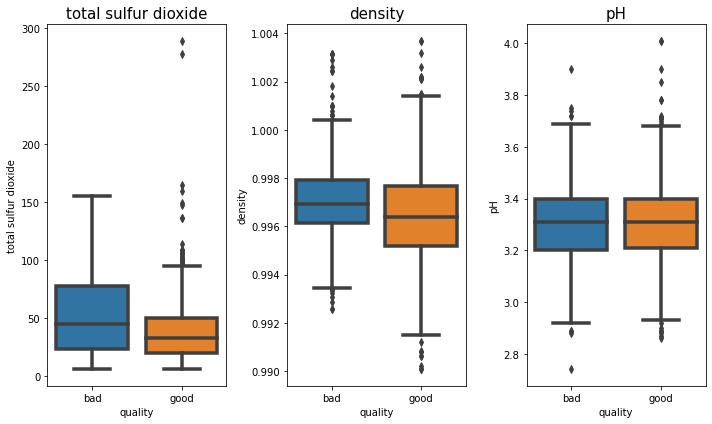

In [9]:
# boxplot for columns 7,8 and 9
fig = plt.figure(figsize=(10,6))
for index,column in enumerate(list(wine_data.columns[6:9])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = wine_data.loc[:, column], x = wine_data["quality"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

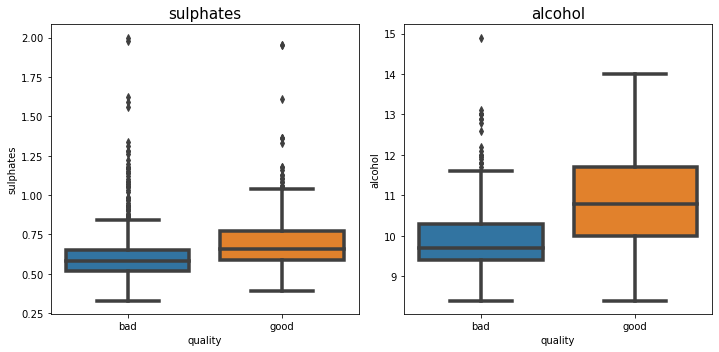

In [10]:
# boxplot for columns 10 and 11
fig = plt.figure(figsize=(15,5))
for index,column in enumerate(list(wine_data.columns[9:11])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = wine_data.loc[:, column], x = wine_data["quality"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

/Users/hasanjama/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


good    855
bad     744
Name: quality, dtype: int64


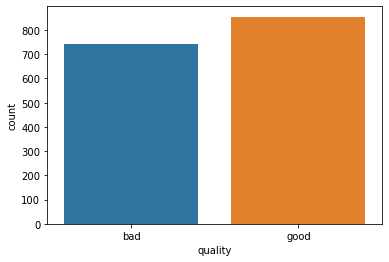

In [11]:
# number of good or bad 
sns.countplot(wine_data["quality"])
print(wine_data.quality.value_counts())

<AxesSubplot:xlabel='alcohol', ylabel='density'>

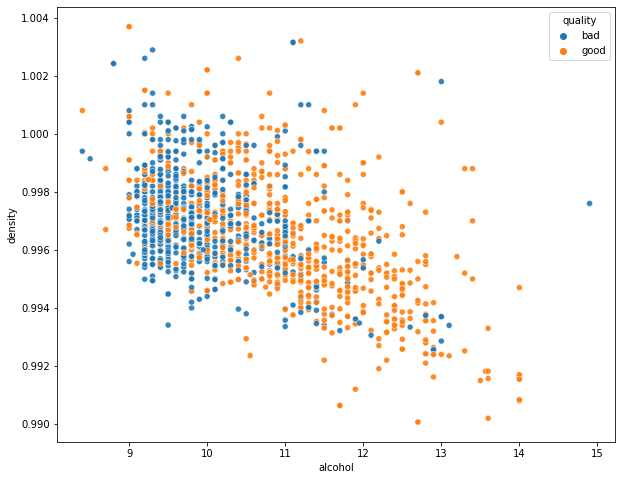

In [12]:
# what is the relationship or difference between alcohol and density in terms of quality 
plt.figure(figsize = (10,8))
sns.scatterplot(x = "alcohol", y = "density", hue = "quality",data = wine_data, alpha = 0.9)

<AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>

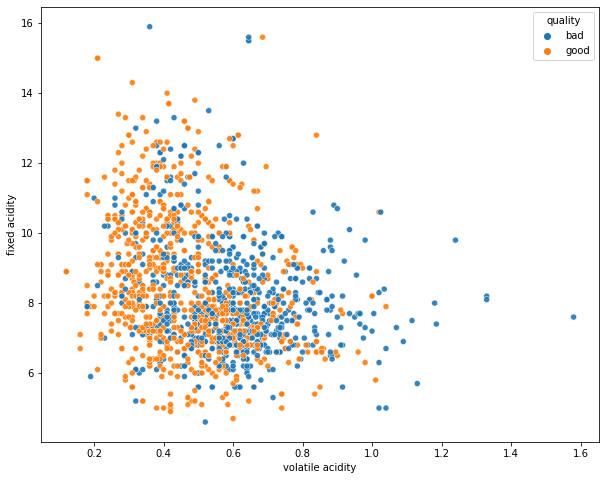

In [13]:
# what is the relationship or difference between volatile acidity and fixed acidity in terms of quality 
plt.figure(figsize = (10,8))
sns.scatterplot(x = "volatile acidity", y = "fixed acidity", hue = "quality",data = wine_data, alpha = 0.9)

In [14]:
#select features and target
x = wine_data.drop('quality', axis = 1).values
y = wine_data['quality'].values

In [15]:
#scale features 
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [16]:
#split data to train and test subsets
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=.20, random_state=1)

## Logistic Regression Algorithm

In [17]:
# Create a logistic regression object then create a GridSearchCV object with cv = 10. 
# then fit the object to find the best parameters
LR1 = LogisticRegression()
parameters1 ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

LRGS = GridSearchCV(LR1,parameters1, cv=10)
LRGS.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [18]:
# make predction using test set 
print("Best parameters: ",LRGS.best_params_)
print("Accuracy:",LRGS.best_score_)

Best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7459092027559056


In [19]:
LRGS.predict_proba(test_x)

array([[0.5080341 , 0.4919659 ],
       [0.6699213 , 0.3300787 ],
       [0.15031259, 0.84968741],
       [0.38334437, 0.61665563],
       [0.03108398, 0.96891602],
       [0.18220307, 0.81779693],
       [0.1382305 , 0.8617695 ],
       [0.85322966, 0.14677034],
       [0.21208398, 0.78791602],
       [0.67532605, 0.32467395],
       [0.1091307 , 0.8908693 ],
       [0.63625822, 0.36374178],
       [0.5210393 , 0.4789607 ],
       [0.06619607, 0.93380393],
       [0.43012903, 0.56987097],
       [0.64932739, 0.35067261],
       [0.17902783, 0.82097217],
       [0.58893935, 0.41106065],
       [0.47915392, 0.52084608],
       [0.61381735, 0.38618265],
       [0.44546947, 0.55453053],
       [0.13288066, 0.86711934],
       [0.65027825, 0.34972175],
       [0.08841784, 0.91158216],
       [0.68344748, 0.31655252],
       [0.08407423, 0.91592577],
       [0.17421237, 0.82578763],
       [0.46209534, 0.53790466],
       [0.71313144, 0.28686856],
       [0.76877476, 0.23122524],
       [0.

In [20]:
# Evaluation
pred = LRGS.predict(test_x)
print('Accuracy Score:', accuracy_score(test_y, pred))
print(classification_report(test_y, pred))
print('confusion matrix:')
print(confusion_matrix(test_y, pred))

Accuracy Score: 0.75
              precision    recall  f1-score   support

         bad       0.74      0.74      0.74       154
        good       0.76      0.76      0.76       166

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

confusion matrix:
[[114  40]
 [ 40 126]]


## KNeighborsClassifier Algorithm

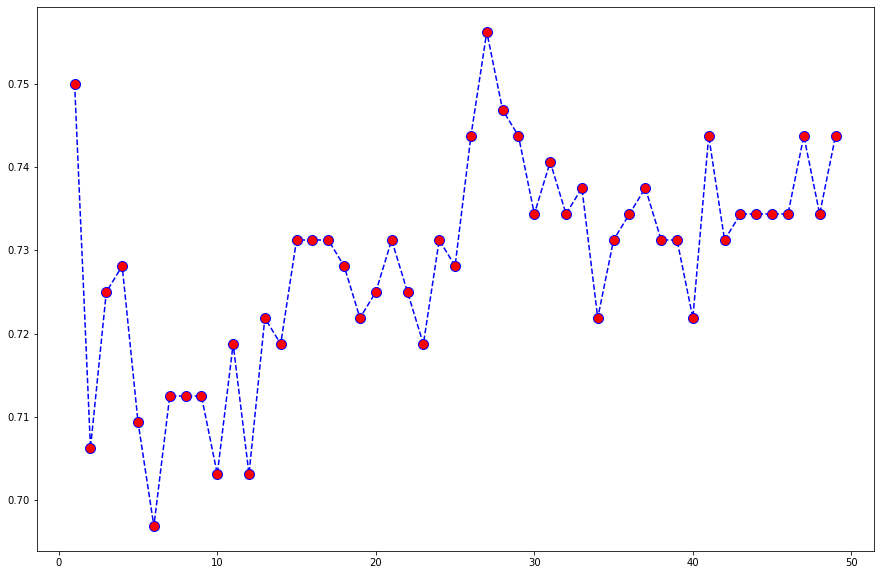

In [21]:
#finding the max accuracy score and its corresponding k value
acc = []
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(train_x,train_y)
    wpred = neigh.predict(test_x)
    acc.append(accuracy_score(test_y, wpred))
plt.figure(figsize=(15,10))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

In [22]:
# Optimal K value found is 27, create object for KNeighborsClassifier and fit model 
k = 27
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(train_x,train_y)
wpred2 = neigh2.predict(test_x)

In [23]:
# Evaluation
print('Optimal K value is 27 with an accuracy score of:', accuracy_score(test_y, wpred2))
print(classification_report(test_y, wpred2))
print(wpred2[0:5])
print(test_y[0:5])

Optimal K value is 27 with an accuracy score of: 0.75625
              precision    recall  f1-score   support

         bad       0.75      0.74      0.75       154
        good       0.76      0.77      0.77       166

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

['good' 'bad' 'good' 'good' 'good']
['bad' 'good' 'good' 'good' 'good']


## Random Forest Classifier Algorithm

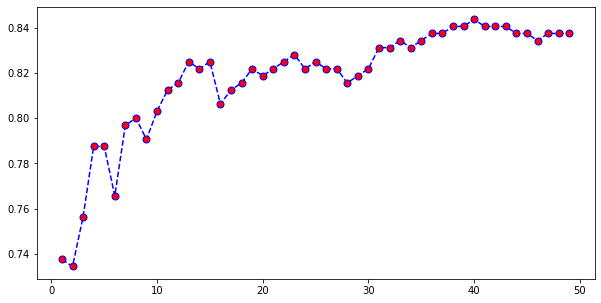

In [24]:
# finding optimal n_estimators score using graph 
n_estimators = []
for i in range(1,50):
    RF = RandomForestClassifier(n_estimators = i, random_state=1)
    RF.fit(train_x, train_y)
    rfpred = RF.predict(test_x)
    n_estimators.append(accuracy_score(test_y, rfpred))
plt.figure(figsize=(10,5))
plt.plot(range(1,50),n_estimators,color ='blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=7)

In [25]:
# optimal n_estimators find is 40 now create object for RandomForestClassifier and fit model 
n_estimators = 40
RF2 = RandomForestClassifier(n_estimators, random_state=1)
RF2.fit(train_x, train_y)
rfpred2 = RF2.predict(test_x)

In [26]:
# Evaluation
print('Accuracy Score:', accuracy_score(test_y, rfpred2))
print(classification_report(test_y, rfpred2))
print('Confusion Matrix')
print(confusion_matrix(test_y, rfpred2))

Accuracy Score: 0.84375
              precision    recall  f1-score   support

         bad       0.84      0.84      0.84       154
        good       0.85      0.85      0.85       166

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320

Confusion Matrix
[[129  25]
 [ 25 141]]


In [28]:
# Random Forest Classifier has the highest accuracy Score with .84375, 
# so lets see how it compares to test_y for the first 15 rows 
pr = pd.DataFrame(columns=["Predicted label","Actual Label"], index= None)
pr["Predicted label"] = rfpred2
pr["Actual Label"] = test_y
pr.head(20)

,Predicted label,Actual Label
0,bad,bad
1,bad,good
2,good,good
3,good,good
4,good,good
5,good,good
6,good,good
7,bad,bad
8,good,bad
9,bad,bad


For the top 20 rows the Random Forest Classifier with n_estimators equal to 40 got 17/20 right.  